In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200507_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200507_P60

## Si II 6355

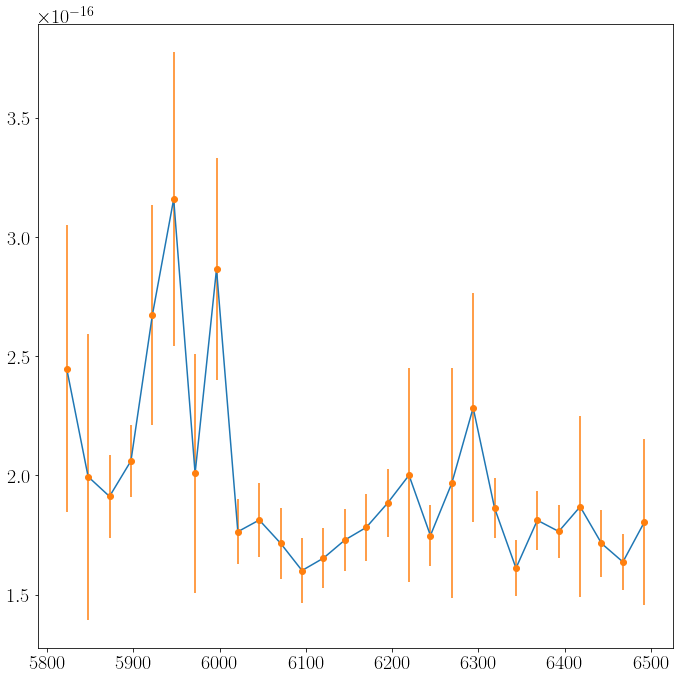

In [4]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5900, 6300, lines=[6371.359, 6347.103])

16 points within 5900.00 and 6300.00 angstroms.


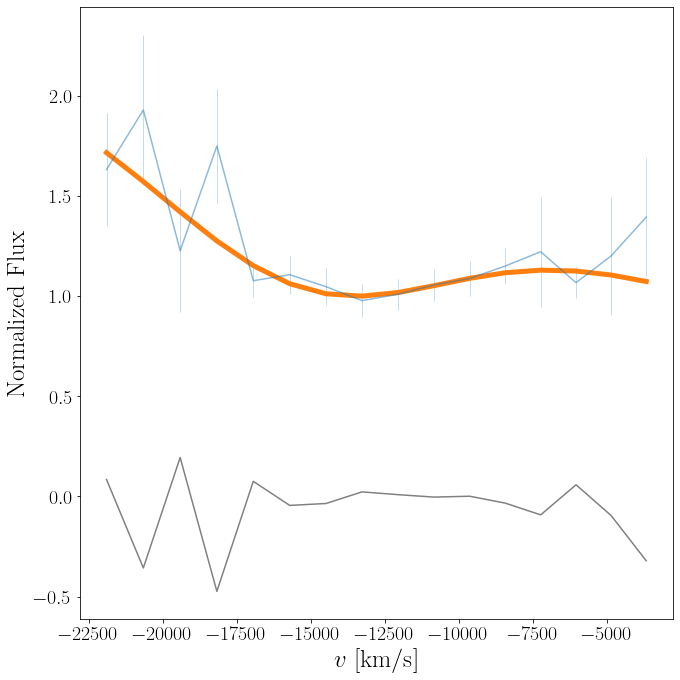

LS estimation:
Velocity pvf: -14685 km/s


In [6]:
Spec1.line['SiII_6355'].LS_estimator()

In [ ]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

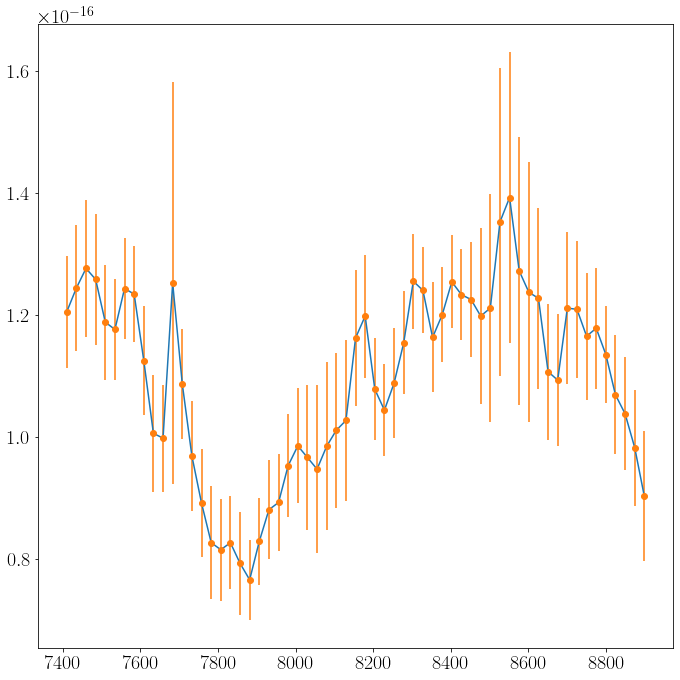

In [7]:
Spec1.plot_line_region(7400, 8900)

In [13]:
Spec1.add_line('CaII_IRT', 7600, 8600, lines=[8498.018, 8542.089, 8662.140])

40 points within 7600.00 and 8600.00 angstroms.


## hvf

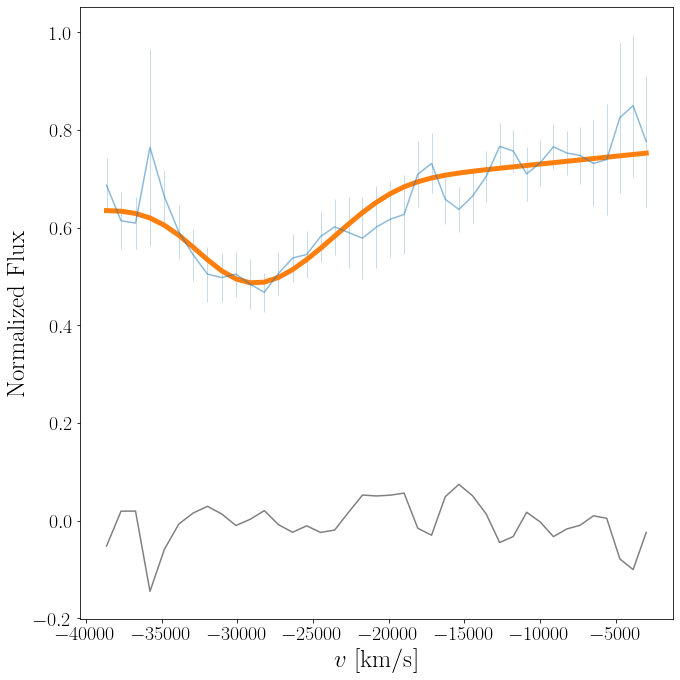

LS estimation:
Velocity pvf: -24660 km/s


In [15]:
Spec1.line['CaII_IRT'].LS_estimator()

  0%|          | 4/50000 [00:00<27:34, 30.21it/s]

MCMC results:
Velocity pvf: -25360 pm 475 km/s


  8%|▊         | 4150/50000 [01:53<20:50, 36.67it/s]  


MCMC results:
Velocity pvf: -25382 pm 467 km/s


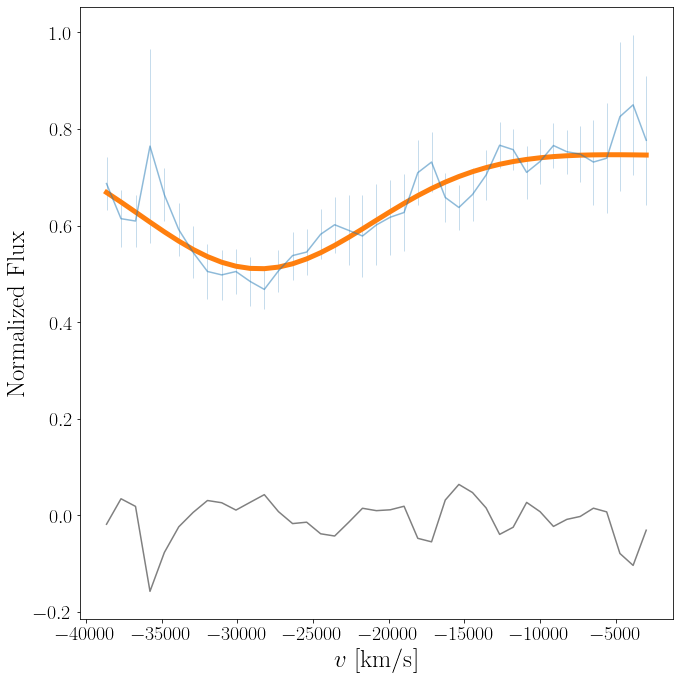

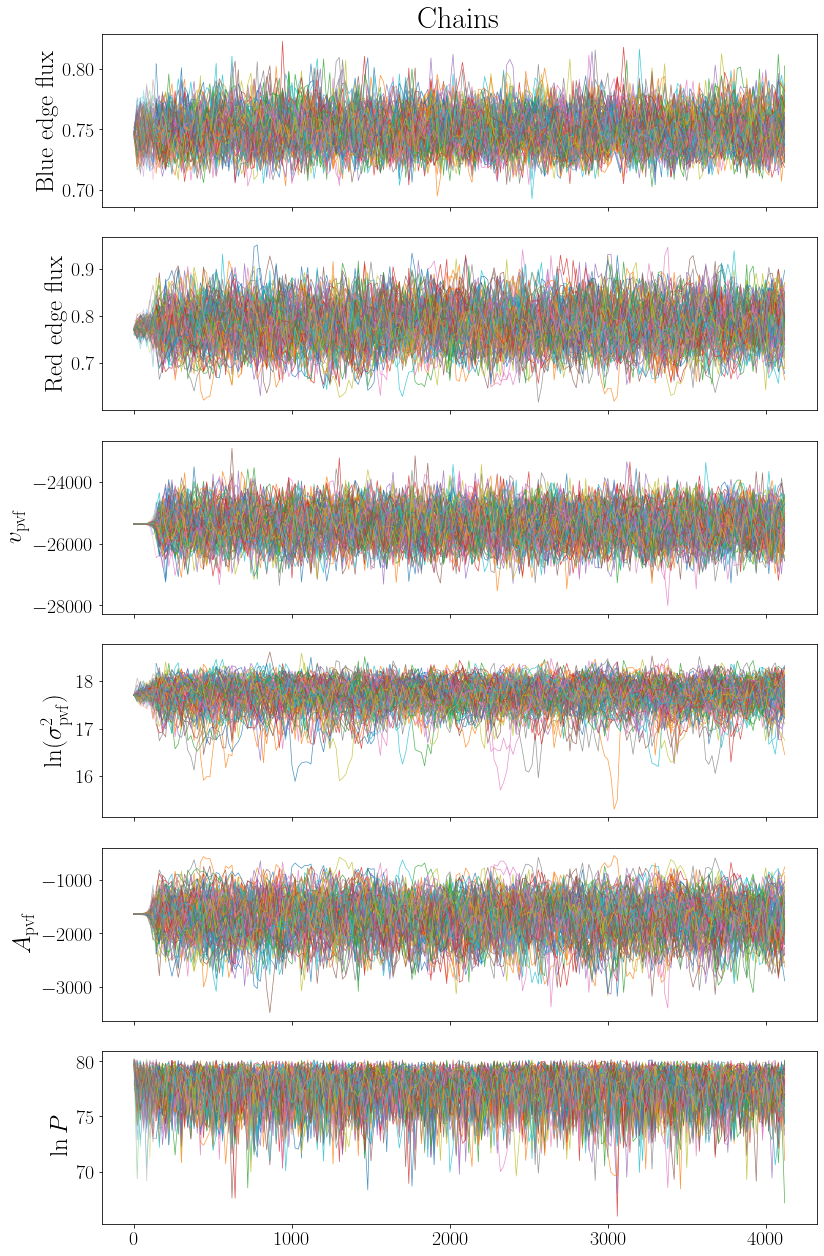

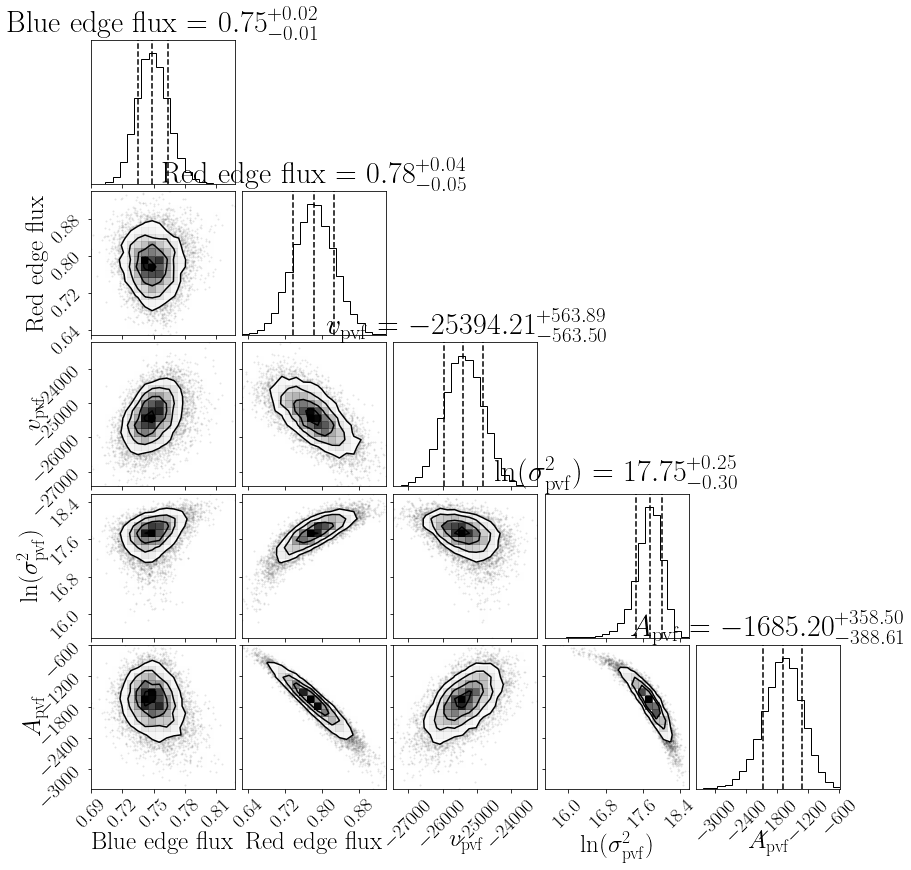

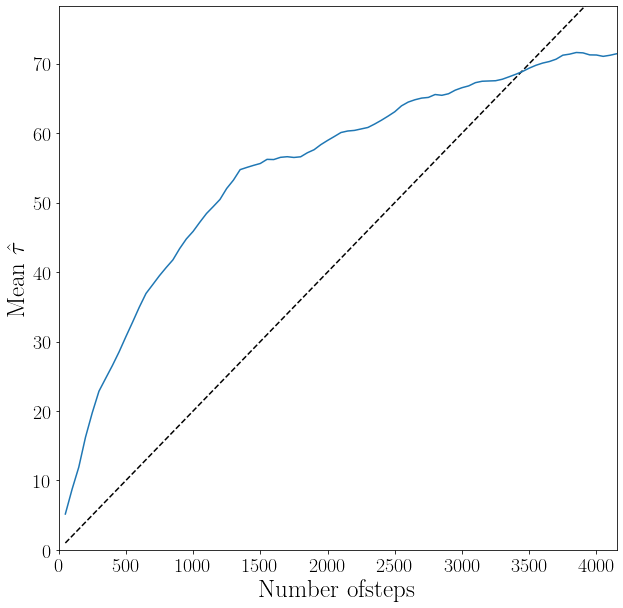

In [18]:
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(initial=[1, 1, -25000, 15, -1000],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)

## hvf + pvf

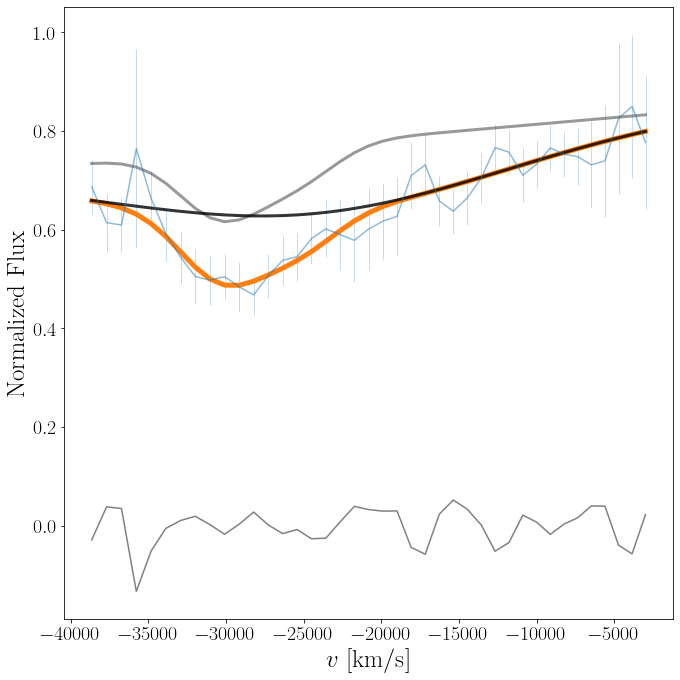

LS estimation:
Velocity pvf: -21179 km/s
Velocity hvf: -25364 km/s


In [16]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -12000, 15, -1000, -25000, 15, -1000))

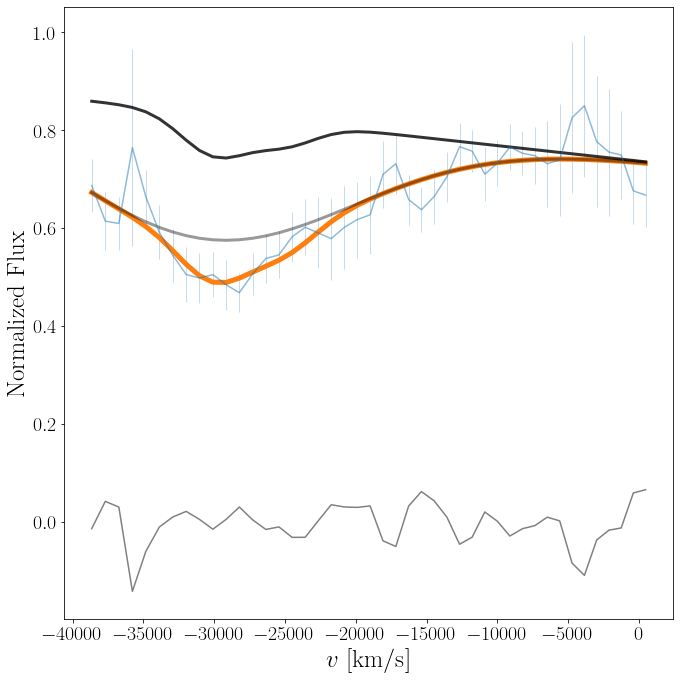

LS estimation:
Velocity pvf: -25028 km/s
Velocity hvf: -27146 km/s


In [9]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -12000, 15, -1000, -25000, 15, -1000))

In [ ]:
mu_pvf_prior = -12000
var_pvf_prior = 2e2**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[1, 1, -12000, 15, -1000, -25000, 15, -1000],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)